In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data= pd.read_csv("CCGENERAL.csv")
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [5]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [6]:
data.isnull().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

In [7]:
columns=['BALANCE']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=65)),Range]=1
    data.loc[((data[c]>65)&(data[c]<=130)),Range]=2
    data.loc[((data[c]>130)&(data[c]<=505)),Range]=3
    data.loc[((data[c]>505)&(data[c]<=875)),Range]=4
    data.loc[((data[c]>875)&(data[c]<=1465)),Range]=5
    data.loc[((data[c]>1465)&(data[c]<=2055)),Range]=6
    data.loc[((data[c]>2055)),Range]=7

In [8]:
columns=['BALANCE']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=0.4)),Range]=1
    data.loc[((data[c]>0.4)&(data[c]<=0.9)),Range]=2

    data.loc[((data[c]>0.9)),Range]=3

In [9]:
columns=['PURCHASES']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=20)),Range]=1
    data.loc[((data[c]>20)&(data[c]<=40)),Range]=2
    data.loc[((data[c]>40)&(data[c]<=205)),Range]=3
    data.loc[((data[c]>205)&(data[c]<=365)),Range]=4
    data.loc[((data[c]>365)&(data[c]<=740)),Range]=5
    data.loc[((data[c]>740)&(data[c]<=1115)),Range]=6
    data.loc[((data[c]>1115)),Range]=7

In [10]:
columns=['ONEOFF_PURCHASES']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=20)),Range]=1
    data.loc[((data[c]>20)&(data[c]<=40)),Range]=2
    data.loc[((data[c]>40)&(data[c]<=310)),Range]=3
    data.loc[((data[c]>310)&(data[c]<=580)),Range]=4

    data.loc[((data[c]>580)),Range]=5

In [11]:
columns=['INSTALLMENTS_PURCHASES']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=45)),Range]=1
    data.loc[((data[c]>45)&(data[c]<=90)),Range]=2
    data.loc[((data[c]>90)&(data[c]<=280)),Range]=3
    data.loc[((data[c]>280)&(data[c]<=470)),Range]=4

    data.loc[((data[c]>470)),Range]=5

In [12]:
columns=['CASH_ADVANCE']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=560)),Range]=1
    data.loc[((data[c]>560)&(data[c]<=1115)),Range]=2

    data.loc[((data[c]>1115)),Range]=3

In [13]:
columns=['PURCHASES_FREQUENCY']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.3)),Range]=2
    data.loc[((data[c]>0.3)&(data[c]<=0.5)),Range]=3
    data.loc[((data[c]>0.5)&(data[c]<=0.7)),Range]=4
    data.loc[((data[c]>0.7)&(data[c]<=0.9)),Range]=5
    data.loc[((data[c]>0.9)),Range]=6

In [14]:
columns=['ONEOFF_PURCHASES_FREQUENCY']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3

    data.loc[((data[c]>0.3)),Range]=4

In [15]:
columns=['PURCHASES_INSTALLMENTS_FREQUENCY']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.5)),Range]=3
    data.loc[((data[c]>0.5)&(data[c]<=0.8)),Range]=4

    data.loc[((data[c]>0.8)),Range]=5

In [16]:
columns=['CASH_ADVANCE_FREQUENCY']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2


    data.loc[((data[c]>0.2)),Range]=3

In [17]:
columns=['CASH_ADVANCE_TRX']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=2)),Range]=1
    data.loc[((data[c]>2)&(data[c]<=4)),Range]=2

    data.loc[((data[c]>4)),Range]=3

In [18]:
columns=['PURCHASES_TRX']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=0.5)),Range]=1
    data.loc[((data[c]>0.5)&(data[c]<=1)),Range]=2
    data.loc[((data[c]>1)&(data[c]<=4)),Range]=3
    data.loc[((data[c]>4)&(data[c]<=7)),Range]=4
    data.loc[((data[c]>7)&(data[c]<=12)),Range]=5
    data.loc[((data[c]>12)&(data[c]<=17)),Range]=6
    data.loc[((data[c]>17)),Range]=7

In [19]:
columns=['CREDIT_LIMIT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>50)&(data[c]<=830)),Range]=1
    data.loc[((data[c]>830)&(data[c]<=1600)),Range]=2
    data.loc[((data[c]>1600)&(data[c]<=2300)),Range]=3
    data.loc[((data[c]>2300)&(data[c]<=3000)),Range]=4
    data.loc[((data[c]>3000)&(data[c]<=4750)),Range]=5
    data.loc[((data[c]>4750)&(data[c]<=6500)),Range]=6
    data.loc[((data[c]>6500)),Range]=7

In [20]:
columns=['PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=195)),Range]=1
    data.loc[((data[c]>195)&(data[c]<=385)),Range]=2
    data.loc[((data[c]>385)&(data[c]<=625)),Range]=3
    data.loc[((data[c]>625)&(data[c]<=860)),Range]=4
    data.loc[((data[c]>860)&(data[c]<=1380)),Range]=5
    data.loc[((data[c]>1380)&(data[c]<=1905)),Range]=6
    data.loc[((data[c]>1905)),Range]=7

In [21]:
columns=['MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=85)),Range]=1
    data.loc[((data[c]>85)&(data[c]<=170)),Range]=2
    data.loc[((data[c]>170)&(data[c]<=245)),Range]=3
    data.loc[((data[c]>245)&(data[c]<=315)),Range]=4
    data.loc[((data[c]>315)&(data[c]<=570)),Range]=5
    data.loc[((data[c]>570)&(data[c]<=830)),Range]=6
    data.loc[((data[c]>830)),Range]=7

In [22]:
columns=['PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=.1)),Range]=1
    data.loc[((data[c]>.1)&(data[c]<=.15)),Range]=2

    data.loc[((data[c]>.15)),Range]=7

In [23]:
columns=['BALANCE']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>6)&(data[c]<=9)),Range]=1

    data.loc[((data[c]>9)),Range]=2

In [24]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

In [25]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 16)

In [26]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

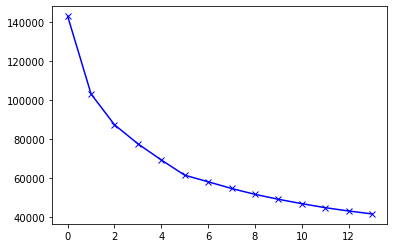

In [27]:
plt.plot(cost, 'bx-',color='purple')

In [28]:
kmean= KMeans(4)
kmean.fit(X)
labels=kmean.labels_

In [29]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,CASH_ADVANCE_TRX_RANGE,PURCHASES_TRX_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PRC_FULL_PAYMENT_RANGE,cluster
0,12,2,3,0,3,0,2,0,1,0,0,3,2,2,2,0,0
1,12,2,0,0,0,3,0,0,0,3,2,0,7,7,7,7,3
2,12,2,6,5,0,0,6,4,0,0,0,5,7,3,6,0,2
3,12,2,7,5,0,1,1,1,0,1,1,2,7,0,7,0,3
4,12,2,1,1,0,0,1,1,0,0,0,2,2,4,3,0,0


In [30]:
data1= pd.read_csv("CCGENERAL.csv")

In [31]:
clusters1=pd.concat([data1, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,CASH_ADVANCE_TRX_RANGE,PURCHASES_TRX_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PRC_FULL_PAYMENT_RANGE,cluster
0,12,2,3,0,3,0,2,0,1,0,0,3,2,2,2,0,0
1,12,2,0,0,0,3,0,0,0,3,2,0,7,7,7,7,3
2,12,2,6,5,0,0,6,4,0,0,0,5,7,3,6,0,2
3,12,2,7,5,0,1,1,1,0,1,1,2,7,0,7,0,3
4,12,2,1,1,0,0,1,1,0,0,0,2,2,4,3,0,0


In [18]:
clusters1.to_csv('C:\\Users\\Karen\\OneDrive\\Documentos\\Tec Data Analytics Bootcamp\\Proyecto\\export_dataframe.csv')


In [32]:
##Yo lo agregué de: https://www.reneshbedre.com/blog/kmeans-clustering-python.html
## Significa: gives within-cluster sum of squares. This is a total of the within-cluster sum of squares for all clusters.

kmean.inertia_
##No me cuadra que el resultado haya sido mayor a 100.

77643.71051827393

In [33]:
##Yo lo agregué de: https://www.reneshbedre.com/blog/kmeans-clustering-python.html
##Significa: number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
kmean.n_iter_

11

In [34]:
#Me dice cuantas observaciones tiene cada cluster
from collections import Counter
Counter(kmean.labels_)

Counter({0: 2764, 3: 2517, 2: 2302, 1: 1367})

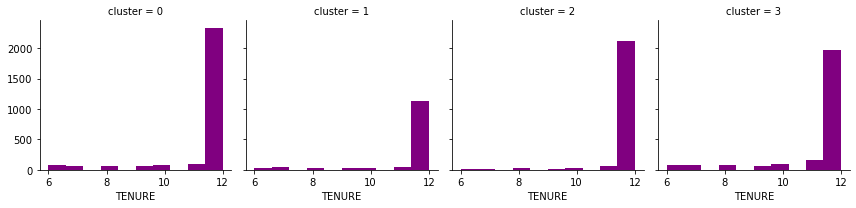

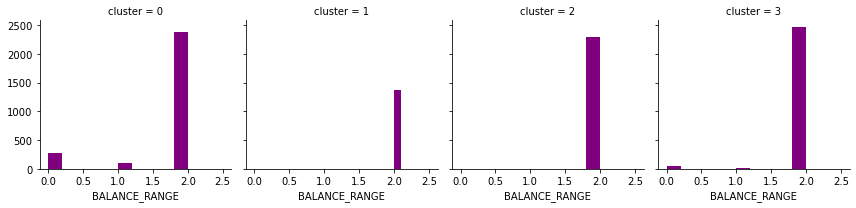

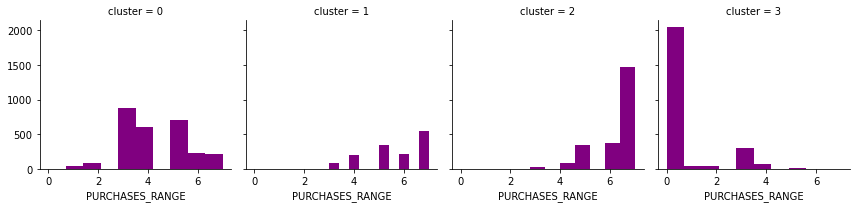

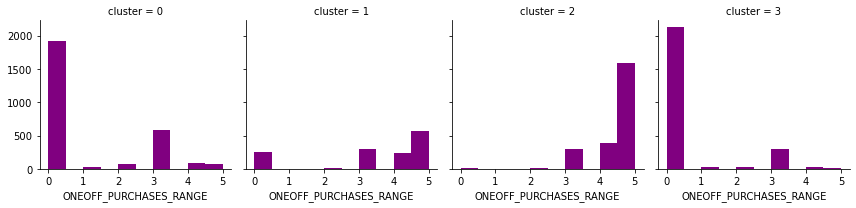

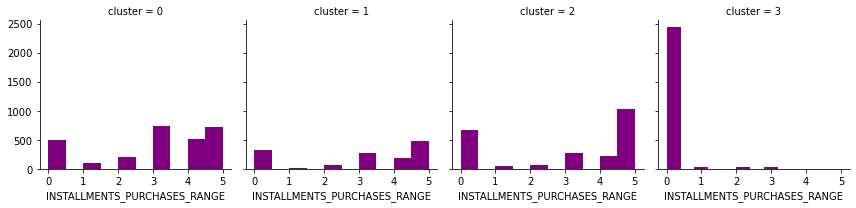

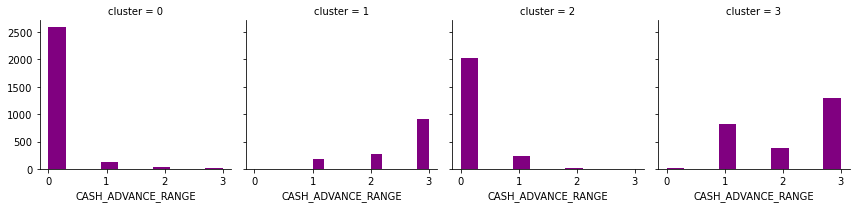

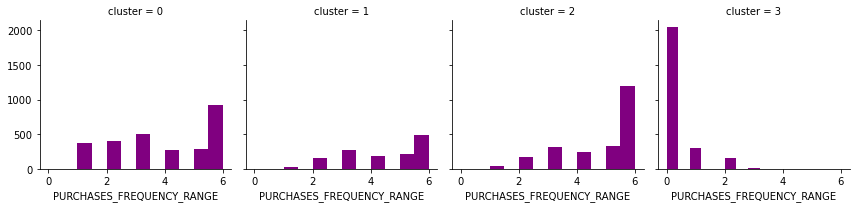

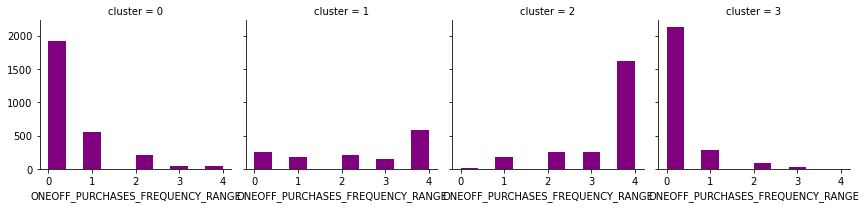

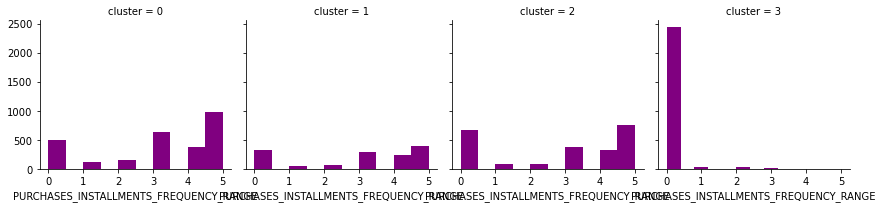

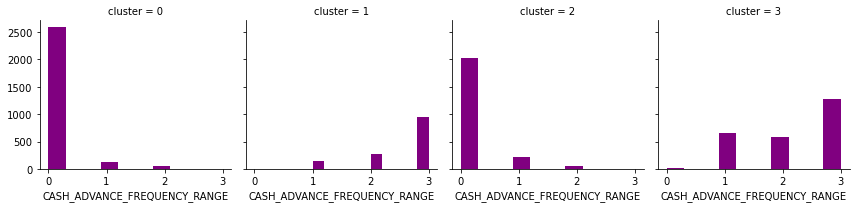

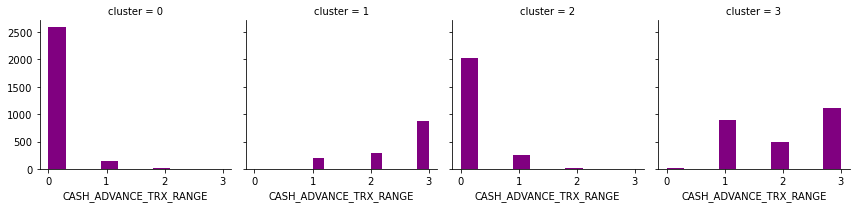

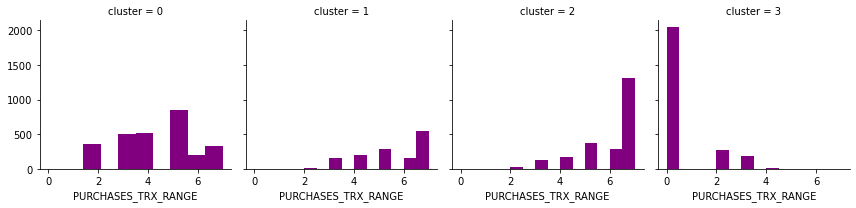

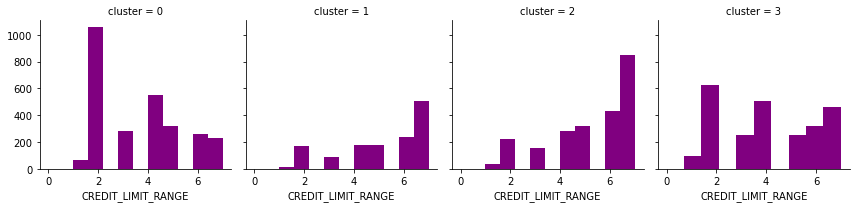

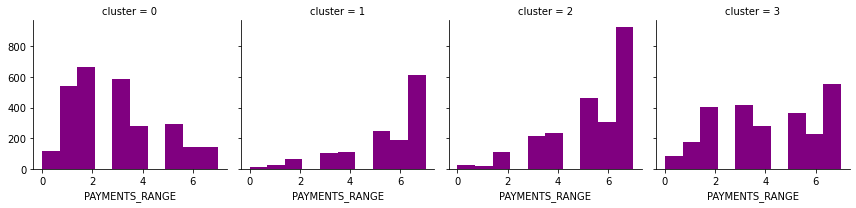

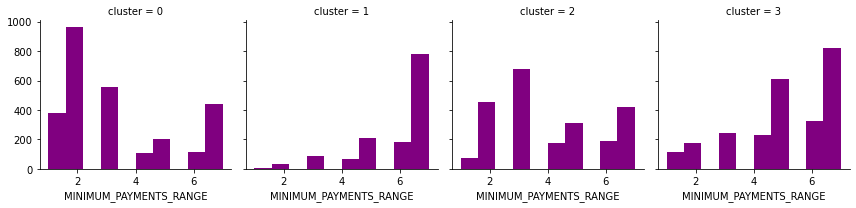

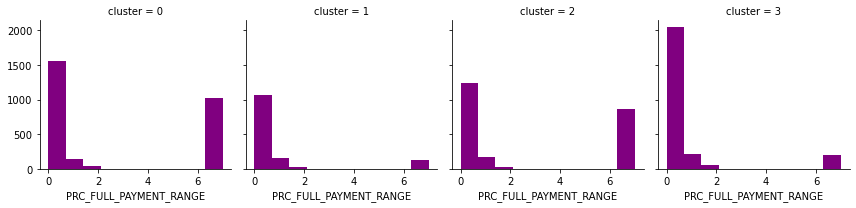

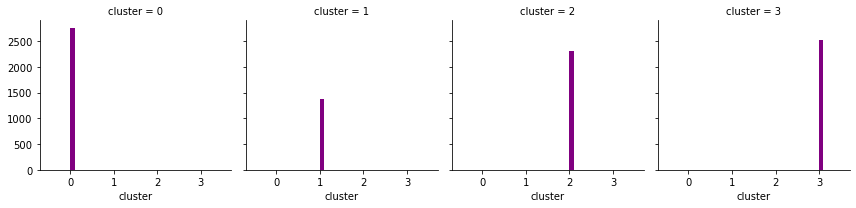

In [35]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c,color='purple')